# **Objective**

Machine Learning Creadit Card Fraud Detection! The task is to predict which transactions are fraud, given a number of features from credit cards.

**supervised classification task**

# 1. Get data

In [1]:
"""!mkdir /home/shayan/PycharmProjects/kaggle
!cp kaggle.json /home/shayan/PycharmProjects/kaggle/
!chmod 600 /home/shayan/PycharmProjects/kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip"""
import warnings
warnings.filterwarnings("ignore")

# 2. Explore data

## 2.1 Dataset information and types

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
transactions = pd.read_csv("creditcard.csv")
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
balance = transactions['Class'].value_counts()
num_samp = len(transactions.index)
print(f"normal transactions, {balance.values[0]}, are {balance.values[0]/num_samp*100:.4f}% of the total samples which is {num_samp}.")
print(f"fraud transactions, {balance.values[1]}, are {balance.values[1]/num_samp*100:.4f}% of the total samples which is {num_samp}.")

normal transactions, 284315, are 99.8273% of the total samples which is 284807.
fraud transactions, 492, are 0.1727% of the total samples which is 284807.


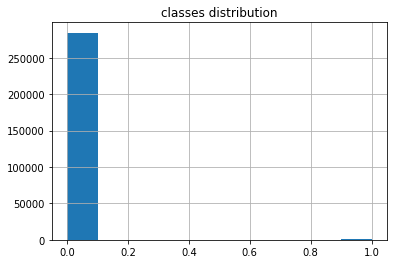

In [6]:
transactions["Class"].hist()
plt.title("classes distribution")
plt.show()

In [7]:
# the dataset is highly imbalanced!
# as the dataset is highly imbalanced in favor of normal transactions the model sees a lot more normal transactions and the models we build would be biased 

## 2.2 Visualize data

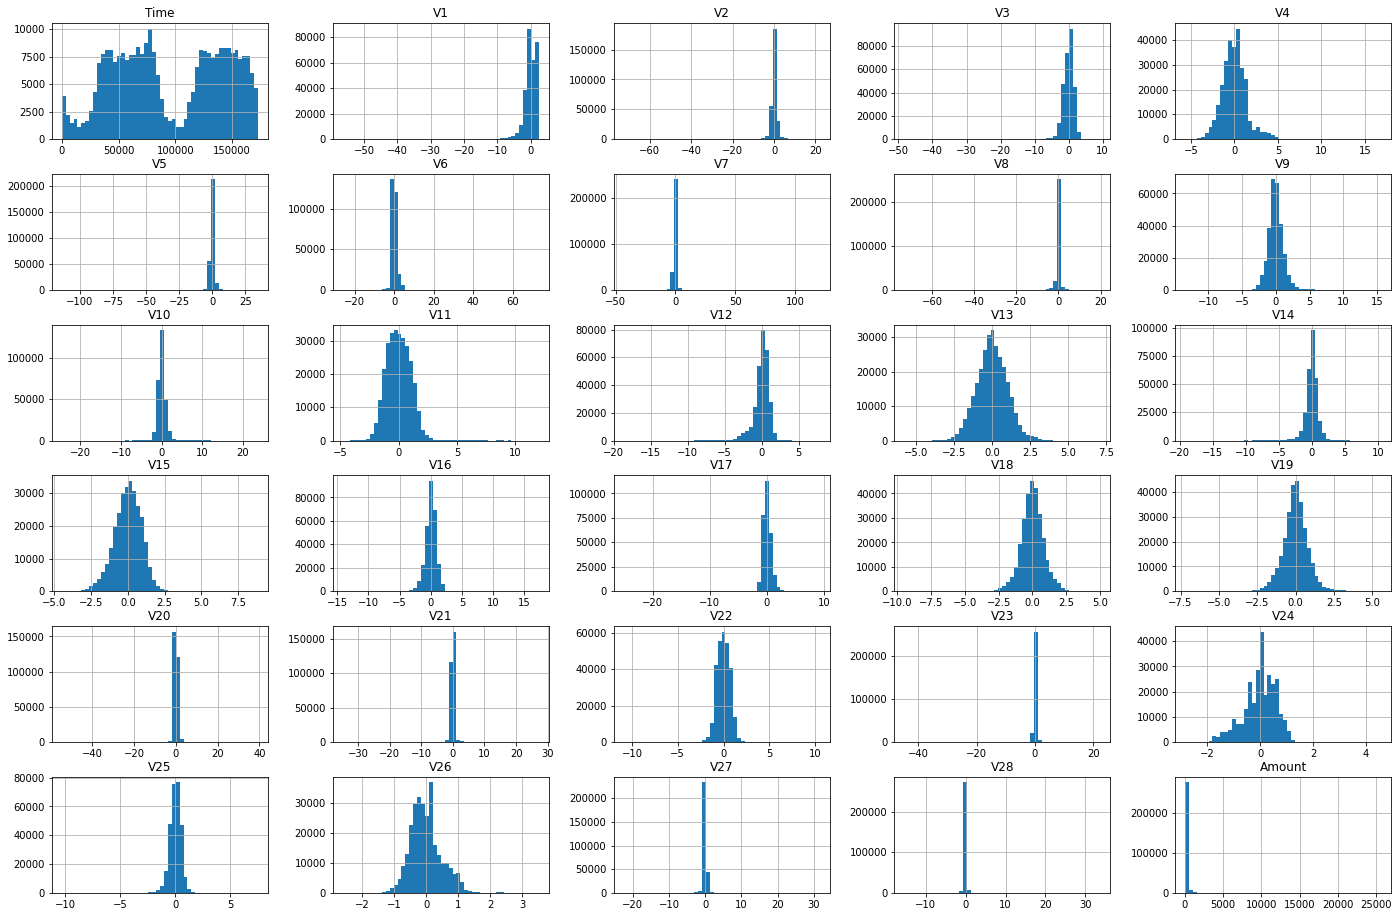

In [8]:
transactions.iloc[:-1,:-1].hist(bins=50, figsize=(24, 16))#class feature has already been shown above
plt.show()

# 3. Split data to train and test sets

In [9]:
from sklearn.model_selection import train_test_split

unused_transactions_train, test = train_test_split(
    transactions, test_size=0.2, stratify=transactions["Class"], random_state=42)
# it's not a random split. I'm choosing the right amount of samples for test and train set based on a important feature, in this case the feature is class
# this transactions_train woudln't be used for training, read undersampling comments. 
# this test set would be used to evaulate the performance of the final models, read undersampling comments. 

## 4.Undersampling

In [11]:
# to deal with highly imbalance dataset, we need to create a dataset which has equal amount of samples for both classes
# however, notice that test set had been splited before undersampling. because in the end we want to measure the performance of the models by the original dataset

# step 1. isolate fraud transactions. class = 1
fraud_transactions = transactions[transactions["Class"] == 1]

# step 2. since we have 492 fraud transactions we gonna need 492 normal transactions to form a balance dataset. we gonna choose normal transactions randomly
normal_transactions = transactions[transactions["Class"] == 0]
random_samples = normal_transactions.index.to_series().sample(n=492, replace=False)
normal_transactions = normal_transactions.iloc[random_samples,:]

# run this cell twice. it may get an error in the first attemp!

In [12]:
print(f"fraud_transactions shape = {fraud_transactions.shape}, normal_transactions shape = {normal_transactions.shape}")

fraud_transactions shape = (492, 31), normal_transactions shape = (492, 31)


In [13]:
# Good! 
# we just need to concat these 2 datasets to have a balance dataset
transactions = pd.concat([fraud_transactions, normal_transactions])
transactions.shape

(984, 31)

In [14]:
# Great! 
# now we have a balance dataset
# we need a train set

transactions_train, unused_test = train_test_split(
    transactions, test_size=0.2, random_state=42)

## 5. Explore train set in more detail

In [15]:
transactions = transactions_train.copy() # to make naming clear, transactions is the train set

In [16]:
transactions.shape

(787, 31)

## 4.1 Data preprocessing

In [17]:
transactions.info()
# no missing value
# no categorical variable

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 228920 to 33276
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    787 non-null    float64
 1   V1      787 non-null    float64
 2   V2      787 non-null    float64
 3   V3      787 non-null    float64
 4   V4      787 non-null    float64
 5   V5      787 non-null    float64
 6   V6      787 non-null    float64
 7   V7      787 non-null    float64
 8   V8      787 non-null    float64
 9   V9      787 non-null    float64
 10  V10     787 non-null    float64
 11  V11     787 non-null    float64
 12  V12     787 non-null    float64
 13  V13     787 non-null    float64
 14  V14     787 non-null    float64
 15  V15     787 non-null    float64
 16  V16     787 non-null    float64
 17  V17     787 non-null    float64
 18  V18     787 non-null    float64
 19  V19     787 non-null    float64
 20  V20     787 non-null    float64
 21  V21     787 non-null    float64
 22  

## 4.1.1 Drop duplicate samples

In [18]:
transactions.duplicated().sum()
# 12 samples are duplicated

12

In [19]:
transactions.drop_duplicates(inplace = True)

In [20]:
transactions.shape

(775, 31)

## 4.1.2 Feature scaling

In [21]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
228920,145719.0,-0.880866,0.846638,-0.637771,-1.095422,2.589313,3.776856,0.121004,1.334295,-0.994670,...,-0.182684,-0.754538,-0.187657,0.727605,0.518264,0.602215,-0.128052,-0.028442,30.49,0
76956,56814.0,-0.755890,0.847825,2.308583,2.969524,-0.434273,-0.196348,0.700484,0.073855,-1.443341,...,-0.150150,-0.823672,0.274696,0.618735,-0.178517,-0.063013,0.032180,0.107183,112.79,0
154286,101051.0,-1.465316,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,...,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.92,1
238779,149817.0,-1.339872,1.171919,-0.065969,-0.742219,-0.274908,-0.226930,0.706975,0.321317,0.147635,...,0.113440,0.409878,-0.166765,-0.625895,-0.138861,-0.413822,-0.521411,-0.316490,88.93,0
268494,163240.0,1.918530,0.463234,-0.941013,3.510380,0.834551,0.714462,0.028079,0.092459,-1.120199,...,0.308554,0.934255,-0.043709,0.299313,0.271846,0.216819,-0.042148,-0.058622,10.59,0


In [22]:
# Time feature -> StandardScaler -> range between 0 to 1
# Amount feature -> RobustScaler -> deals better with outliers

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler1 = StandardScaler()
scaler2 = RobustScaler()

transactions["Time"] = scaler1.fit_transform(transactions[["Time"]])
transactions["Amount"] = scaler1.fit_transform(transactions[["Amount"]])

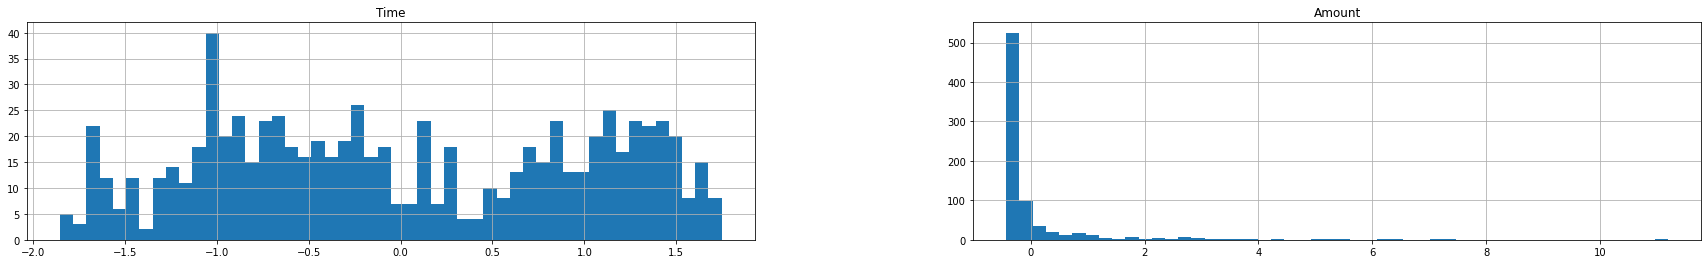

In [23]:
transactions.loc[:,["Time", "Amount"]].hist(bins=50, figsize=(30, 4))
plt.show()

## 4.2 Correlations

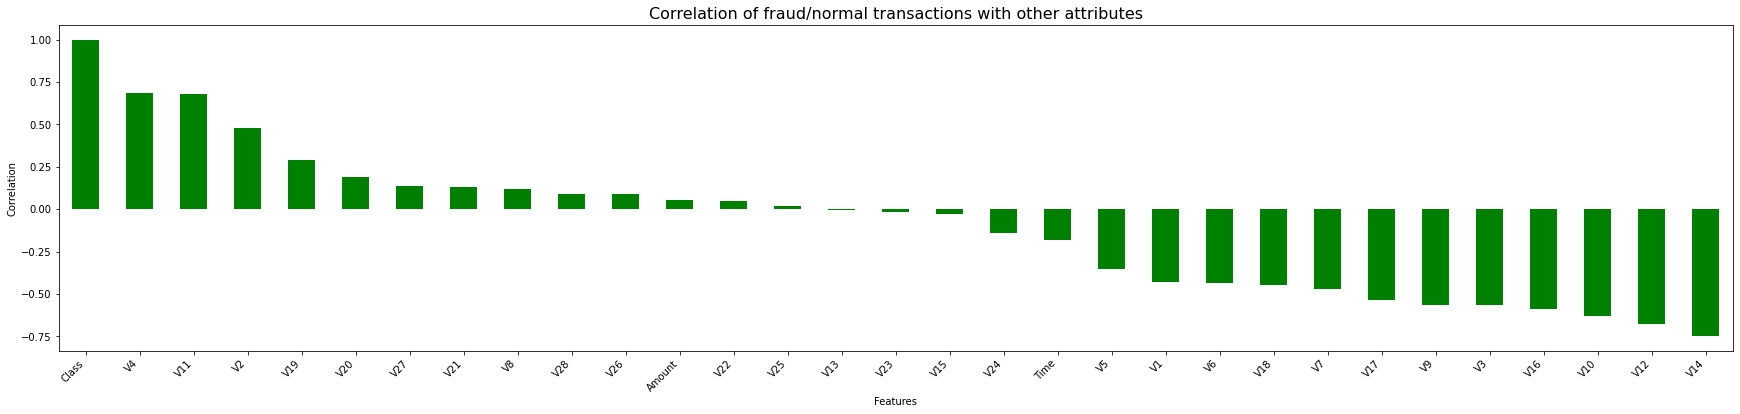

In [24]:
# let's measure correlations
corr_matrix = transactions.corr()

# Let's visualize correlations

plt.figure(figsize=(30, 6))
corr_matrix["Class"].sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Correlation of fraud/normal transactions with other attributes", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha="right")
plt.show()

In [25]:
# V4 has the biggest positive correlation with transaction being fraud or normal
# V14 has the biggest negative correlation with transaction being fraud or normal

In [26]:
# V25 feature has almost no effect on the transaction being fraud or normal. it can be dropped.
transactions.drop(columns="V25", inplace=True)

In [27]:
transactions.shape
# now we have 30 features

(775, 30)

## 4.2.1 Reduce redundant dimensionality - Multicollinearity


In [28]:
# check whether there are highly correlated features to choose one of them

corr_matrix = transactions.corr()
features_corr = corr_matrix.iloc[:-1, :-1]
target_corr = corr_matrix["Class"]

high_corrs = set()
for feature in features_corr.columns:  # finding features which are highly correlated with the current feature
    cols = features_corr.index[abs(features_corr[feature]) > 0.8]
    for col in cols:
        if col != feature and col not in high_corrs:
            high_corrs.add(col)
            
high_corrs = list(high_corrs)
high_corrs.sort()

high_corrs_dict = {} # this dictionary would have features which are highly similar, and the correlation of each of them with the target value (ESTIMATED_VISITS)

for feature in high_corrs:
    high_corrs_dict[feature] = target_corr[feature]

In [29]:
high_corrs_dict

{'V1': -0.4297998255108193,
 'V10': -0.6286258191474224,
 'V11': 0.6821148008390857,
 'V12': -0.6752778367420006,
 'V14': -0.7500368897914719,
 'V16': -0.5863290351487185,
 'V17': -0.5386466422907739,
 'V18': -0.4504163218577706,
 'V2': 0.48174739892098994,
 'V3': -0.5631948542904243,
 'V4': 0.687707077303625,
 'V5': -0.3515699755130413,
 'V7': -0.4735531950858382,
 'V9': -0.5630487234038427}

In [30]:
# among highly correlated features, I want to keep only one that has the greatest absolute value correlation with the target value.
keep = [] 
seen = set() # as I iterate through features, I want to calculate their correlation with the target value just once
for feature in high_corrs_dict.keys():
    if feature in seen: # if the feature was seen previously, it has been calculated before, go to the next feature
        continue
    greatest = feature
    corr_features = features_corr.index[abs(features_corr[feature]) > 0.8].tolist()
    corr_features.remove(feature) # list of correlated features
    for f in corr_features:
        seen.add(f)
        if abs(high_corrs_dict[f]) > abs(high_corrs_dict[greatest]): # if its correlation is greater
            greatest = f
    if greatest not in keep:
        keep.append(greatest)

In [31]:
len(keep)
# great! among 14 features, 4 of them carry the most influence on target value (Class/ transactions being fraud or normal), and the rest are redundant

5

In [32]:
# interestes columns are kept columns (previously calculated from correlations) + the ones which didn't have a high correlation with other features
unique_cols = set(transactions.columns) - set(high_corrs_dict.keys())
cols = keep + list(unique_cols)

len(cols)
# we've reduced attributes to 20

21

In [33]:
transactions = transactions[cols]
transactions.shape

(775, 21)

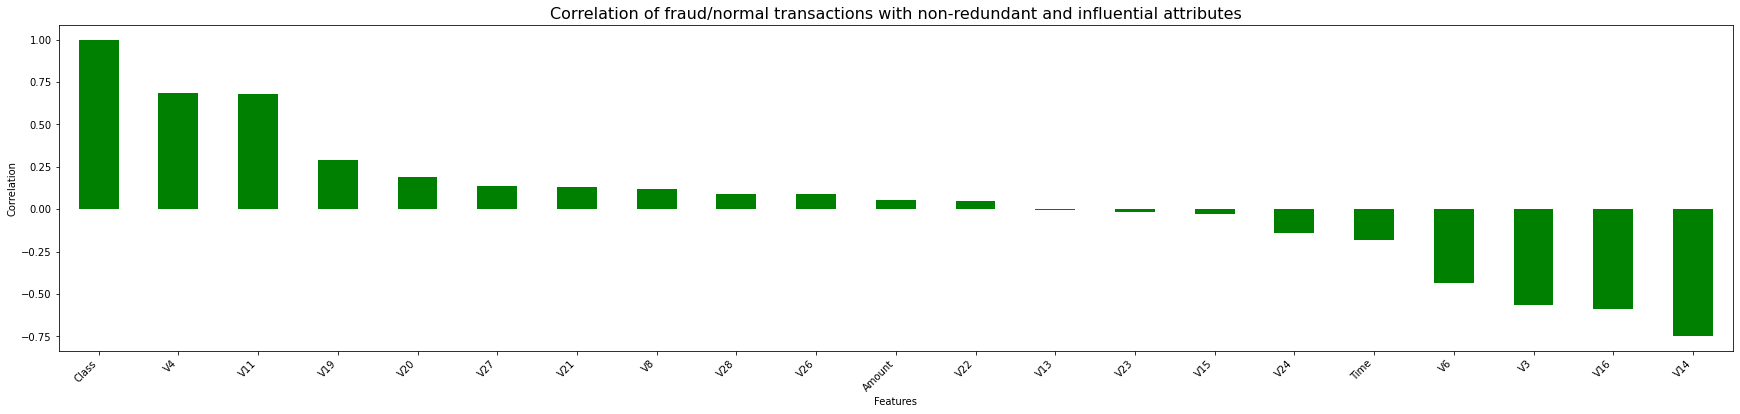

In [34]:
# let's visualize correlations again
corr_matrix = transactions.corr()

plt.figure(figsize=(30, 6))
corr_matrix["Class"].sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Correlation of fraud/normal transactions with non-redundant and influential attributes", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha="right")
plt.show()

# 5. Automating preprocessing using pipelines

In [35]:
# datasets to feed the models

transactions_train.drop_duplicates(inplace = True) # drop duplicate rows

# y
transactions_target = transactions_train.pop("Class") # separate target feature

# Xs
cols.remove("Class") # Class is the target feature, so it should be dropped from features
transactions = transactions_train[cols] # only interestes columns as describe above 

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

standard = ["Time"]
robust = ["Amount"]
preprocess_cols = standard+robust
no_process = list(transactions.columns)
for col in preprocess_cols:
  no_process.remove(col)

preprocessing = ColumnTransformer([
        ("standard", StandardScaler(), standard),
        ("robust", RobustScaler(), robust),
        ("passthrough", "passthrough", no_process),
    ])


In [37]:
# Great! We have a preprocessing pipeline that takes the full dataset and applies the appropriate transformations to each column.

# 6. Select and train models

## 6.1 Logistic regression

In [38]:
# building the model using pipeline
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression()),
])

In [39]:
# train the model
log_reg.fit(transactions, transactions_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Time']),
                                                 ('robust', RobustScaler(),
                                                  ['Amount']),
                                                 ('passthrough', 'passthrough',
                                                  ['V3', 'V11', 'V14', 'V16',
                                                   'V4', 'V27', 'V22', 'V26',
                                                   'V13', 'V24', 'V15', 'V28',
                                                   'V19', 'V20', 'V8', 'V23',
                                                   'V6', 'V21'])])),
                ('logistic_regression', LogisticRegression())])

In [40]:
# calculate evaluation metric using precision and recall
from sklearn.metrics import classification_report

log_predictions = log_reg.predict(transactions)
print(classification_report(transactions_target, log_predictions, target_names = ["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.98      0.94       394
       Fraud       0.97      0.91      0.94       381

    accuracy                           0.94       775
   macro avg       0.94      0.94      0.94       775
weighted avg       0.94      0.94      0.94       775



In [41]:
# precision: means out of all predicted fraud transactions, 97% are actually fraud. But, 3% of normal transactions are also captured as fraud.
# recall: means out of all actual fraud transactions, 89% are captured correctly and prevented. And, 11% of fraud transactions are not captured and went through!

In [42]:
# cross-validation
from sklearn.model_selection import KFold, cross_val_score

cv_scores = cross_val_score(log_reg, transactions, transactions_target, cv=5, scoring='f1')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print mean and standard deviation of cross-validation scores
print("Mean CV F1-Score of logistic regression:", mean_cv_score)
print("Standard Deviation of CV F1-Scores of logistic regression:", std_cv_score)

Mean CV F1-Score of logistic regression: 0.9279701840121577
Standard Deviation of CV F1-Scores of logistic regression: 0.015583589297264139


## 6.2 KNN

In [43]:
# building the model using pipeline
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([
    ("preprocessing", preprocessing),
    ("KNN", KNeighborsClassifier()),
])

In [44]:
# train the model
knn.fit(transactions, transactions_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Time']),
                                                 ('robust', RobustScaler(),
                                                  ['Amount']),
                                                 ('passthrough', 'passthrough',
                                                  ['V3', 'V11', 'V14', 'V16',
                                                   'V4', 'V27', 'V22', 'V26',
                                                   'V13', 'V24', 'V15', 'V28',
                                                   'V19', 'V20', 'V8', 'V23',
                                                   'V6', 'V21'])])),
                ('KNN', KNeighborsClassifier())])

In [45]:
# calculate evaluation metric using precision and recall

knn_predictions = knn.predict(transactions)
print(classification_report(transactions_target, knn_predictions, target_names = ["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.90      0.98      0.94       394
       Fraud       0.98      0.89      0.93       381

    accuracy                           0.94       775
   macro avg       0.94      0.94      0.94       775
weighted avg       0.94      0.94      0.94       775



In [46]:
# precision: means out of all predicted fraud transactions, 97% are actually fraud. But, 3% of normal transactions are captured as fraud incorrectly
# recall: means out of all actual fraud transactions, 90% are caputered and prevented but 10% didn't capture and went through

In [47]:
# cross-validation

cv_scores = cross_val_score(knn, transactions, transactions_target, cv=5, scoring='f1')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print mean and standard deviation of cross-validation scores
print("Mean CV F1-Score of KNN:", mean_cv_score)
print("Standard Deviation of CV F1-Scores of KNN:", std_cv_score)

Mean CV F1-Score of KNN: 0.9156174153215157
Standard Deviation of CV F1-Scores of KNN: 0.019614739911189057


## 6.3 Support vector machine

In [48]:
# building the model using pipeline
from sklearn.svm import SVC

svm = Pipeline([
    ("preprocessing", preprocessing),
    ("svm", SVC(kernel='linear')),
])

In [49]:
# train the model
svm.fit(transactions, transactions_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Time']),
                                                 ('robust', RobustScaler(),
                                                  ['Amount']),
                                                 ('passthrough', 'passthrough',
                                                  ['V3', 'V11', 'V14', 'V16',
                                                   'V4', 'V27', 'V22', 'V26',
                                                   'V13', 'V24', 'V15', 'V28',
                                                   'V19', 'V20', 'V8', 'V23',
                                                   'V6', 'V21'])])),
                ('svm', SVC(kernel='linear'))])

In [50]:
# calculate evaluation metric using precision and recall

svm_predictions = svm.predict(transactions)
print(classification_report(transactions_target, svm_predictions, target_names = ["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.98      0.94       394
       Fraud       0.97      0.90      0.94       381

    accuracy                           0.94       775
   macro avg       0.94      0.94      0.94       775
weighted avg       0.94      0.94      0.94       775



In [51]:
# precision: means out of all predicted fraud transactions, 98% are actually fraud. But, 2% of normal transactions are captured as fraud incorrectly
# recall: means out of all actual fraud transactions, 87% are caputered and prevented but 13% didn't capture and went through

In [52]:
# cross-validation

cv_scores = cross_val_score(svm, transactions, transactions_target, cv=5, scoring='f1')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print mean and standard deviation of cross-validation scores
print("Mean CV F1-Score of SVM:", mean_cv_score)
print("Standard Deviation of CV F1-Scores of SVM:", std_cv_score)

Mean CV F1-Score of SVM: 0.9261931220624506
Standard Deviation of CV F1-Scores of SVM: 0.012923446026143974


## 6.4 Decision tree classifier

In [53]:
# building the model using pipeline
from sklearn.tree import DecisionTreeClassifier

tree_cls = Pipeline([
    ("preprocessing", preprocessing),
    ("tree_classification", DecisionTreeClassifier()),
])

In [54]:
# train the model
tree_cls.fit(transactions, transactions_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Time']),
                                                 ('robust', RobustScaler(),
                                                  ['Amount']),
                                                 ('passthrough', 'passthrough',
                                                  ['V3', 'V11', 'V14', 'V16',
                                                   'V4', 'V27', 'V22', 'V26',
                                                   'V13', 'V24', 'V15', 'V28',
                                                   'V19', 'V20', 'V8', 'V23',
                                                   'V6', 'V21'])])),
                ('tree_classification', DecisionTreeClassifier())])

In [55]:
# calculate evaluation metric using precision and recall

tree_predictions = tree_cls.predict(transactions)
print(classification_report(transactions_target, tree_predictions, target_names = ["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00       394
       Fraud       1.00      1.00      1.00       381

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [56]:
# not possible! it's overfitting

In [57]:
# cross-validation

cv_scores = cross_val_score(tree_cls, transactions, transactions_target, cv=5, scoring='f1')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print mean and standard deviation of cross-validation scores
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)

Mean CV Score: 0.9073830349250972
Standard Deviation of CV Scores: 0.012964249861156915


In [58]:
# by cross validation the decesion tree model is the weakest model

In [59]:
# among all models(logistic regression, KNN, SVM, and decesion tree) after cross-validation the best model based on the F1-score is logistic regression

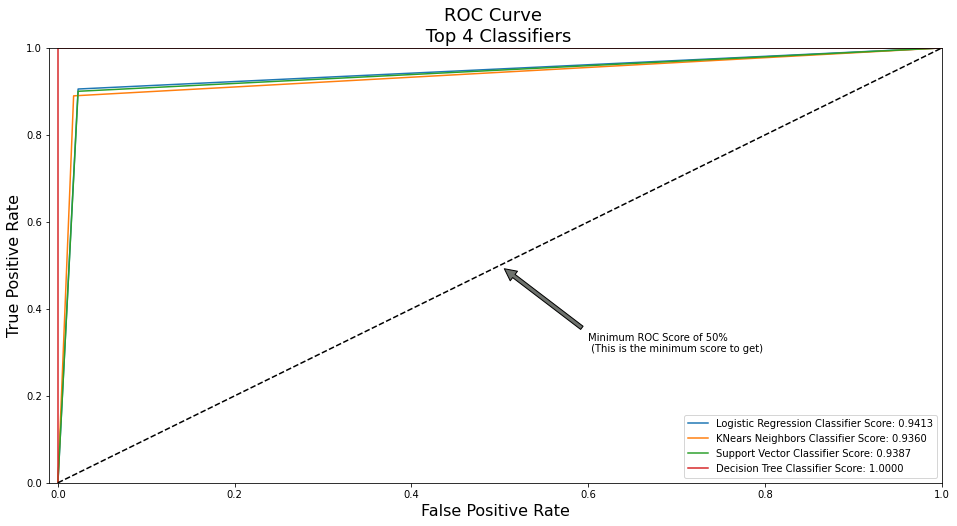

In [60]:
# plot ROC carve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log_fpr, log_tpr, log_thresold = roc_curve(transactions_target, log_predictions)
knear_fpr, knear_tpr, knear_threshold = roc_curve(transactions_target, knn_predictions)
svc_fpr, svc_tpr, svc_threshold = roc_curve(transactions_target, svm_predictions)
tree_fpr, tree_tpr, tree_threshold = roc_curve(transactions_target, tree_predictions)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(transactions_target, log_predictions)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(transactions_target, knn_predictions)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(transactions_target, svm_predictions)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(transactions_target, tree_predictions)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## 7. Fine-tune models

In [61]:
# fine-tune the performace model, logistic regression

from sklearn.model_selection import GridSearchCV

log_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression()),
]) # building the model using pipeline

param_grid = [
    {"logistic_regression__penalty": ['l1', 'l2'], "logistic_regression__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
  ] # a list of logistic regression model hyperparameters


log_grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')

In [62]:
# train random logistic regression model with all combinations of hyperparameters
# 14 different model, each train 5 times, makes it 70 rounds of training!
log_grid_search.fit(transactions, transactions_target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['Time']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Amount']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['V3',
                                                                          'V11',
                                                                          'V14',
                                                                          'V16',
                                                                          'V4',
                                                                          'V27',
                                                                          'V22',
                                                                          'V26',
                                                                          'V13',
                                                                          'V24',
                                                                          'V15',
                                                                          'V28',
                                                                          'V19',
                                                                          'V20',
                                                                          'V8',
                                                                          'V23',
                                                                          'V6',
                                                                          'V21'])])),
                                       ('logistic_regression',
                                        LogisticRegression())]),
             param_grid=[{'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10,
                                                     100, 1000],
                          'logistic_regression__penalty': ['l1', 'l2']}],
             scoring='f1')

In [63]:
# the evaluation scores
cvres = log_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(mean_score), params)

nan {'logistic_regression__C': 0.001, 'logistic_regression__penalty': 'l1'}
0.9563592653386649 {'logistic_regression__C': 0.001, 'logistic_regression__penalty': 'l2'}
nan {'logistic_regression__C': 0.01, 'logistic_regression__penalty': 'l1'}
0.9586899086421585 {'logistic_regression__C': 0.01, 'logistic_regression__penalty': 'l2'}
nan {'logistic_regression__C': 0.1, 'logistic_regression__penalty': 'l1'}
0.9648987548296768 {'logistic_regression__C': 0.1, 'logistic_regression__penalty': 'l2'}
nan {'logistic_regression__C': 1, 'logistic_regression__penalty': 'l1'}
0.9633120906602167 {'logistic_regression__C': 1, 'logistic_regression__penalty': 'l2'}
nan {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l1'}
0.9634288852819288 {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l2'}
nan {'logistic_regression__C': 100, 'logistic_regression__penalty': 'l1'}
0.9634288852819288 {'logistic_regression__C': 100, 'logistic_regression__penalty': 'l2'}
nan {'logistic_regress

In [64]:
# The hyperparameters are {'logistic_regression__C': 1, 'logistic_regression__penalty': 'l2'} for the logistic regression model
# the f1-score is 0.959569709299981

## 8. Evaluate the model on the test set

In [66]:
test_target = test.pop("Class") # separate actual values

In [67]:
final_model = log_grid_search.best_estimator_ # the previously fine-tuned model
test_prediction = final_model.predict(test[cols]) 
print(classification_report(test_target, test_prediction, target_names = ["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56864
       Fraud       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [68]:
# precision: means out of all predicted fraud transactions, 5% are actually fraud. And, 95% of normal transactions are captured as fraud incorrectly
# recall: means out of all actual fraud transactions, 90% are caputered and prevented but 10% didn't capture and went through

In [70]:
# what else: SMOTE Technique (Over-Sampling) ...